In [ ]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For better visuals
sns.set(style="whitegrid")

In [ ]:
# Step 2: Create a sample dataset (if you don't have one)
# Suppose sales data for a retail store (daily)

date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
np.random.seed(42)

sales = np.random.randint(200, 1000, size=(len(date_rng))) + \
        np.linspace(0, 1000, len(date_rng)).astype(int)  # upward trend

data = pd.DataFrame({'date': date_rng, 'sales': sales})
data.head()


,date,sales
0,2023-01-01,302
1,2023-01-02,637
2,2023-01-03,475
3,2023-01-04,314
4,2023-01-05,281


In [ ]:
# Step 3: Feature Engineering
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek
data['day'] = data['date'].dt.day

# Lag feature (previous day sales)
data['prev_day_sales'] = data['sales'].shift(1)
data = data.dropna()
data.head()


,date,sales,month,day_of_week,day,prev_day_sales
1,2023-01-02,637,1,0,2,302.0
2,2023-01-03,475,1,1,3,637.0
3,2023-01-04,314,1,2,4,475.0
4,2023-01-05,281,1,3,5,314.0
5,2023-01-06,913,1,4,6,281.0


In [ ]:
# Step 4: Split data
X = data[['month', 'day_of_week', 'day', 'prev_day_sales']]
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 291
Testing samples: 73


In [ ]:
# Step 5: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [ ]:
# Step 6: Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 217.8374638085588
Root Mean Squared Error: 253.69529134367704
R² Score: -0.06863344939239946


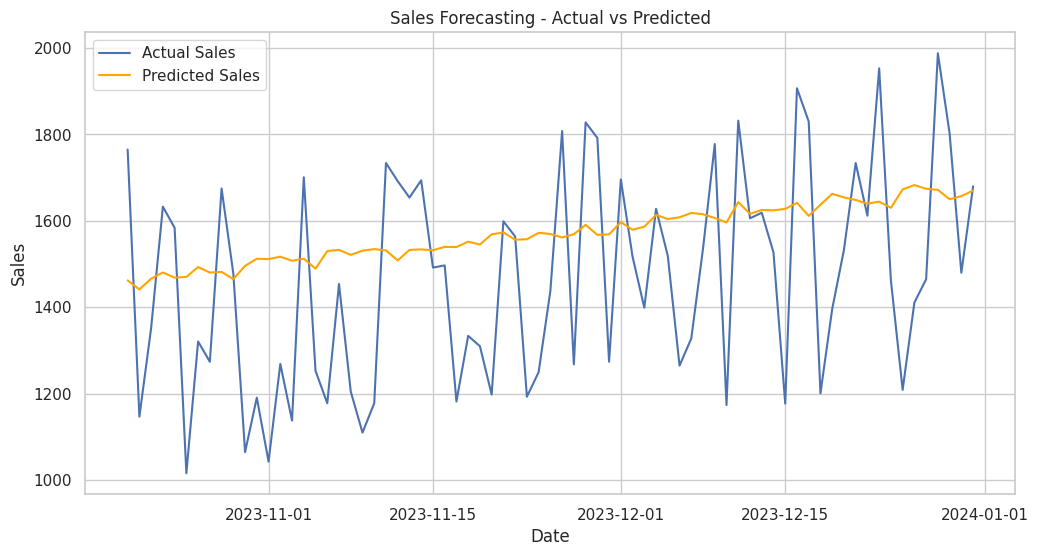

In [ ]:
# Step 7: Visualization
plt.figure(figsize=(12,6))
plt.plot(data['date'][-len(y_test):], y_test, label='Actual Sales')
plt.plot(data['date'][-len(y_test):], y_pred, label='Predicted Sales', color='orange')
plt.title('Sales Forecasting - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
!pip install xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost R²: -0.1971437931060791


In [ ]:
# Step 9: Forecast Next 7 Days
last_row = data.iloc[-1].copy()

future_predictions = []
for i in range(7):
    new_row = {
        'month': (last_row['date'] + pd.Timedelta(days=1)).month,
        'day_of_week': (last_row['date'] + pd.Timedelta(days=1)).dayofweek,
        'day': (last_row['date'] + pd.Timedelta(days=1)).day,
        'prev_day_sales': last_row['sales']
    }
    pred = model.predict(pd.DataFrame([new_row]))[0]
    next_date = last_row['date'] + pd.Timedelta(days=1)
    future_predictions.append({'date': next_date, 'predicted_sales': pred})
    last_row = {'date': next_date, 'sales': pred}

future_df = pd.DataFrame(future_predictions)
print(future_df)


        date  predicted_sales
0 2024-01-01       543.097947
1 2024-01-02       589.156311
2 2024-01-03       586.933172
3 2024-01-04       586.680600
4 2024-01-05       586.347602
5 2024-01-06       586.017886
6 2024-01-07       585.688036
